<a href="https://colab.research.google.com/github/DataBytes-Organisation/Fine-Tuning-LLMs-for-Enterprise-Applications/blob/akhila_branch/sentiment_analysis_drug_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Building

In [ ]:
# Install required packages
!pip install transformers textblob pandas scikit-learn nltk seaborn --quiet
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
#Import libraries
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from sklearn.metrics import classification_report, accuracy_score
import random
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from textblob import TextBlob
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Imports
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [ ]:
# Load FLAN-T5 Model and Tokenizer
model_name = "google/flan-t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
#  Classifier functions (use your existing FLAN-T5 model)
def classify_sentiment_zero_shot(text):
    prompt = f"Classify the sentiment of this review as positive, negative, or neutral: {text}"
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    output = model.generate(**inputs, max_new_tokens=5)
    return tokenizer.decode(output[0], skip_special_tokens=True).strip().lower()

def classify_part_sentiment(text, category):
    prompt = f"Classify the sentiment of the following {category} review as positive, negative, or neutral: {text}"
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    output = model.generate(**inputs, max_new_tokens=5)
    return tokenizer.decode(output[0], skip_special_tokens=True).strip().lower()


In [ ]:
multi_reviews = [
    {
        "benefits": "It reduced my anxiety within a few days.",
        "side_effects": "But I constantly felt sleepy and had trouble concentrating.",
        "comments": "I'm not sure if I’ll continue using it long-term."
    },
    {
        "benefits": "The medication significantly improved my focus and energy.",
        "side_effects": "Minor dry mouth, but it went away after a week.",
        "comments": "I’m really happy with the results."
    },
    {
        "benefits": "Didn't really see any improvements after two weeks.",
        "side_effects": "Severe nausea and occasional chest pain.",
        "comments": "I had to stop taking it immediately."
    },
    {
        "benefits": "Helped with my joint pain somewhat.",
        "side_effects": "Occasional stomach upset, nothing too serious.",
        "comments": "I’ll keep trying it for a few more weeks before deciding."
    },
    {
        "benefits": "Completely cleared up my skin and boosted my confidence.",
        "side_effects": "None that I noticed at all.",
        "comments": "I wish I had started using it earlier."
    }
]

In [ ]:
def predict_and_print_reviews(review_list):
    for i, review in enumerate(review_list, 1):
        benefits = review["benefits"]
        side_effects = review["side_effects"]
        comments = review["comments"]

        combined = f"Benefits Review: {benefits}\nSide Effects Review: {side_effects}\nComments: {comments}"

        b_sent = classify_part_sentiment(benefits, "benefits").capitalize()
        s_sent = classify_part_sentiment(side_effects, "side effects").capitalize()
        c_sent = classify_part_sentiment(comments, "comments").capitalize()
        overall = classify_sentiment_zero_shot(combined).capitalize()

        print(f"\n Review {i}")
        print(f"• Benefits: {benefits}")
        print(f"  ↪ Sentiment: {b_sent}")
        print(f"• Side Effects: {side_effects}")
        print(f"  ↪ Sentiment: {s_sent}")
        print(f"• Comments: {comments}")
        print(f"  ↪ Sentiment: {c_sent}")
        print(f"\n Predicted Overall Sentiment: {overall}")


In [ ]:
predict_and_print_reviews(multi_reviews)



 Review 1
• Benefits: It reduced my anxiety within a few days.
  ↪ Sentiment: Positive
• Side Effects: But I constantly felt sleepy and had trouble concentrating.
  ↪ Sentiment: Negative
• Comments: I'm not sure if I’ll continue using it long-term.
  ↪ Sentiment: Negative

 Predicted Overall Sentiment: Negative

 Review 2
• Benefits: The medication significantly improved my focus and energy.
  ↪ Sentiment: Positive
• Side Effects: Minor dry mouth, but it went away after a week.
  ↪ Sentiment: Negative
• Comments: I’m really happy with the results.
  ↪ Sentiment: Positive

 Predicted Overall Sentiment: Positive

 Review 3
• Benefits: Didn't really see any improvements after two weeks.
  ↪ Sentiment: Negative
• Side Effects: Severe nausea and occasional chest pain.
  ↪ Sentiment: Negative
• Comments: I had to stop taking it immediately.
  ↪ Sentiment: Negative

 Predicted Overall Sentiment: Negative

 Review 4
• Benefits: Helped with my joint pain somewhat.
  ↪ Sentiment: Positive
• Sid

# Model Training

In [ ]:
#clear Memory cache
import torch
torch.cuda.empty_cache()
print("GPU memory cleared.")

GPU memory cleared.


In [ ]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets
train_df = pd.read_csv('/content/drive/My Drive/Team Project A/Dataset/Drug_review/drugLibTrain_raw.tsv', sep='\t')
test_df = pd.read_csv('/content/drive/My Drive/Team Project A/Dataset/Drug_review/drugLibTest_raw.tsv', sep='\t')

In [ ]:
# View the dataset
print(train_df.columns)
train_df.head()

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [ ]:
train_df.isna().sum()

,0
Unnamed: 0,0
urlDrugName,0
rating,0
effectiveness,0
sideEffects,0
condition,1
benefitsReview,18
sideEffectsReview,75
commentsReview,12


In [ ]:
#  Clean
review_cols = ['benefitsReview', 'sideEffectsReview', 'commentsReview']
train_df = train_df.dropna(subset=review_cols + ['rating'])
train_df = train_df[(train_df[review_cols] != '').all(axis=1)].copy()
test_df = test_df.dropna(subset=review_cols + ['rating'])
test_df = test_df[(test_df[review_cols] != '').all(axis=1)].copy()

In [ ]:
# Keep only relevant columns
train_df = train_df[['rating', 'benefitsReview', 'sideEffectsReview', 'commentsReview']].dropna()
test_df = test_df[['rating', 'benefitsReview', 'sideEffectsReview', 'commentsReview']].dropna()

In [ ]:
train_df.head()

,rating,benefitsReview,sideEffectsReview,commentsReview
0,4,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [ ]:
# Define sentiment based on rating
def get_sentiment(rating):
    if rating >= 7:
        return 'positive'
    elif rating <= 4:
        return 'negative'
    else:
        return 'neutral'

# Map sentiment
train_df['sentiment'] = train_df['rating'].apply(get_sentiment)
test_df['sentiment'] = test_df['rating'].apply(get_sentiment)

In [ ]:
# Combine review columns
train_df['combined_text'] = train_df['benefitsReview'] + " " + train_df['sideEffectsReview'] + " " + train_df['commentsReview']
test_df['combined_text'] = test_df['benefitsReview'] + " " + test_df['sideEffectsReview'] + " " + test_df['commentsReview']

In [ ]:
train_df.head()

,rating,benefitsReview,sideEffectsReview,commentsReview,sentiment,combined_text
0,4,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",negative,slowed the progression of left ventricular dys...
1,1,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",negative,Although this type of birth control has more c...
2,10,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,positive,I was used to having cramps so badly that they...
3,3,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,negative,The acid reflux went away for a few months aft...
4,2,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,negative,I think that the Lyrica was starting to help w...


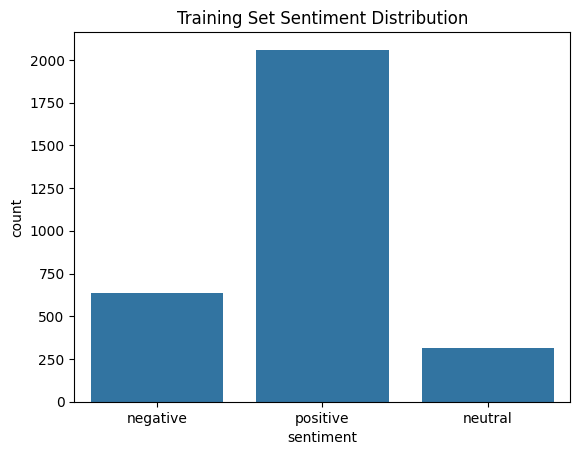

In [ ]:
#checking data imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Training set plot
sns.countplot(data=train_df, x='sentiment')
plt.title("Training Set Sentiment Distribution")
plt.show()


In [ ]:
# Split dataset by class
neutral_df = train_df[train_df['sentiment'] == 'neutral']
negative_df = train_df[train_df['sentiment'] == 'negative']
positive_df = train_df[train_df['sentiment'] == 'positive']

In [ ]:
# Decide how many samples to oversample
#  Match the number of positive samples
target_size = positive_df.shape[0]  # Make all classes as big as the majority

In [ ]:
# Oversample neutral and negative classes
oversampled_neutral = neutral_df.sample(n=target_size, replace=True, random_state=42)
oversampled_negative = negative_df.sample(n=target_size, replace=True, random_state=42)

In [ ]:
# Combine to form a balanced dataset
balanced_train_df = pd.concat([positive_df, oversampled_negative, oversampled_neutral], ignore_index=True)

In [ ]:
# Shuffle the final training dataframe
balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

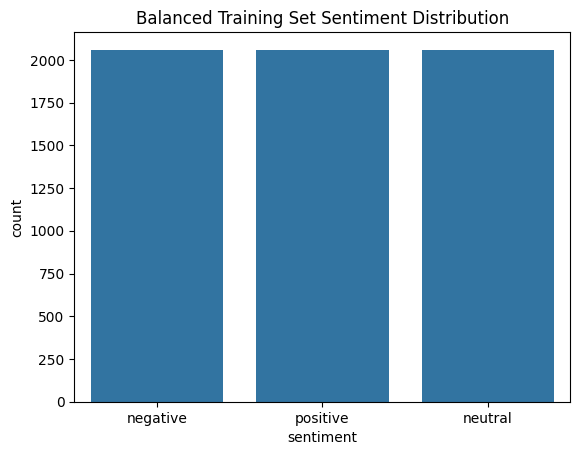

In [ ]:
# Show new class distribution
sns.countplot(data=balanced_train_df, x='sentiment')
plt.title("Balanced Training Set Sentiment Distribution")
plt.show()

In [ ]:
# Create prompt+target columns
balanced_train_df['input_text'] = (
    "Read the review and classify the sentiment as:\n"
    "- positive: if it clearly praises the drug,\n"
    "- negative: if it clearly criticizes the drug,\n"
    "- neutral: if it's mixed or neither.\n\n"
    "Review: " + balanced_train_df['combined_text']
)
balanced_train_df['target_text'] = balanced_train_df['sentiment']
test_df['input_text'] = (
    "Read the review and classify the sentiment as:\n"
    "- positive: if it clearly praises the drug,\n"
    "- negative: if it clearly criticizes the drug,\n"
    "- neutral: if it's mixed or neither.\n\n"
    "Review: " + test_df['combined_text']
)
test_df['target_text'] = test_df['sentiment']

In [ ]:
balanced_train_df.head()

,rating,benefitsReview,sideEffectsReview,commentsReview,sentiment,combined_text,input_text,target_text
0,1,"Amoxicillin did little, if any, good for the i...",I had a severe allergic reaction in the form o...,"After I had the reaction to amoxicillin, I dis...",negative,"Amoxicillin did little, if any, good for the i...",Read the review and classify the sentiment as:...,negative
1,4,Decrease in panic attacks (maybe these were ho...,Still have headaches - not clear if these are ...,oral medication - presumably the same substanc...,negative,Decrease in panic attacks (maybe these were ho...,Read the review and classify the sentiment as:...,negative
2,4,clear head - sometimes / less allergy - sometimes,"Back pain, breathing problems, anxiety/hyperac...",Took it for a year. Never knew if it really h...,negative,clear head - sometimes / less allergy - someti...,Read the review and classify the sentiment as:...,negative
3,7,Through use of the drug and the side effects i...,Oil in stool,I was to take one dose and a full glass of wat...,positive,Through use of the drug and the side effects i...,Read the review and classify the sentiment as:...,positive
4,6,It worked but then I became addicted to methad...,At first I got painful headaches but that subs...,I began recieving Methadone when I was 21 year...,neutral,It worked but then I became addicted to methad...,Read the review and classify the sentiment as:...,neutral


In [ ]:
# Load Model and Apply LoRA
from transformers import T5Tokenizer, T5ForConditionalGeneration
from peft import get_peft_model, LoraConfig, TaskType

# Load pretrained Flan-T5 base
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

# Apply LoRA adapters
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

trainable params: 884,736 || all params: 248,462,592 || trainable%: 0.3561


PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): T5ForConditionalGeneration(
      (shared): Embedding(32128, 768)
      (encoder): T5Stack(
        (embed_tokens): Embedding(32128, 768)
        (block): ModuleList(
          (0): T5Block(
            (layer): ModuleList(
              (0): T5LayerSelfAttention(
                (SelfAttention): T5Attention(
                  (q): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features=8, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=8, out_features=768, bias=False)
                    )
                    (lora_embedding_A): ParameterDict()
               

In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration
from torch.optim import AdamW
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        input_text = self.texts[index]
        target_text = self.labels[index]
        input_enc = self.tokenizer(
            input_text, padding="max_length", truncation=True, max_length=self.max_len, return_tensors="pt"
        )
        target_enc = self.tokenizer(
            target_text, padding="max_length", truncation=True, max_length=10, return_tensors="pt"
        )
        return {
            "input_ids": input_enc.input_ids.squeeze(),
            "attention_mask": input_enc.attention_mask.squeeze(),
            "labels": target_enc.input_ids.squeeze()
        }

train_dataset = SentimentDataset(balanced_train_df['input_text'].tolist(), balanced_train_df['target_text'].tolist(), tokenizer)
test_dataset = SentimentDataset(test_df['input_text'].tolist(), test_df['target_text'].tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)


In [ ]:
def train_model(model, train_loader, epochs, learning_rate):
    model = model.to(device)
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

In [ ]:
def evaluate_model(model, test_loader, tokenizer):
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score,
        f1_score, confusion_matrix, classification_report
    )
    import seaborn as sns
    import matplotlib.pyplot as plt

    model.eval()
    true_labels, pred_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            generated_ids = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=10)
            preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
            labels = tokenizer.batch_decode(batch["labels"], skip_special_tokens=True)

            pred_labels.extend([p.strip().lower() for p in preds])
            true_labels.extend([l.strip().lower() for l in labels])

    # Metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)
    cm = confusion_matrix(true_labels, pred_labels, labels=["positive", "neutral", "negative"])

    print("\n Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["positive", "neutral", "negative"],
                yticklabels=["positive", "neutral", "negative"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(true_labels, pred_labels, digits=4, zero_division=0))

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

In [ ]:
# Train the model
train_model(model, train_loader, epochs=3, learning_rate=3e-5)

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1/3, Loss: 13.8796
Epoch 2/3, Loss: 3.0844
Epoch 3/3, Loss: 1.2371



 Evaluation Metrics:
Accuracy: 0.7567
Precision (weighted): 0.7308
Recall (weighted): 0.7567
F1 Score (weighted): 0.7333


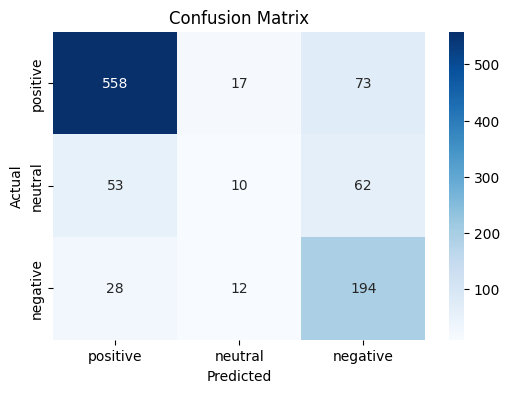


Classification Report:
              precision    recall  f1-score   support

    negative     0.5897    0.8291    0.6892       234
     neutral     0.2564    0.0800    0.1220       125
    positive     0.8732    0.8611    0.8671       648

    accuracy                         0.7567      1007
   macro avg     0.5731    0.5901    0.5594      1007
weighted avg     0.7308    0.7567    0.7333      1007



In [ ]:
# Evaluate the model
metrics = evaluate_model(model, test_loader, tokenizer)

In [ ]:
#clear Memory cache
import torch
torch.cuda.empty_cache()
print("GPU memory cleared.")

GPU memory cleared.



 Trying combination 1/5: LR=3e-05, Batch Size=8, Epochs=3
Epoch 1/3, Loss: 0.4608
Epoch 2/3, Loss: 0.2660
Epoch 3/3, Loss: 0.1997

 Evaluation Metrics:
Accuracy: 0.7537
Precision (weighted): 0.7329
Recall (weighted): 0.7537
F1 Score (weighted): 0.7364


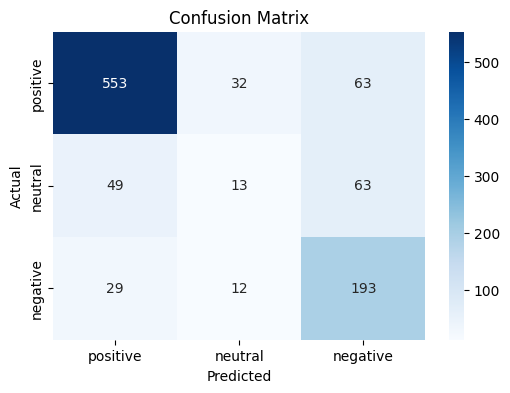


Classification Report:
              precision    recall  f1-score   support

    negative     0.6050    0.8248    0.6980       234
     neutral     0.2281    0.1040    0.1429       125
    positive     0.8764    0.8534    0.8647       648

    accuracy                         0.7537      1007
   macro avg     0.5698    0.5941    0.5685      1007
weighted avg     0.7329    0.7537    0.7364      1007

Finished combination 1/5

 Trying combination 2/5: LR=1e-05, Batch Size=8, Epochs=4
Epoch 1/4, Loss: 0.5594
Epoch 2/4, Loss: 0.4165
Epoch 3/4, Loss: 0.3327
Epoch 4/4, Loss: 0.2817

 Evaluation Metrics:
Accuracy: 0.7676
Precision (weighted): 0.7359
Recall (weighted): 0.7676
F1 Score (weighted): 0.7351


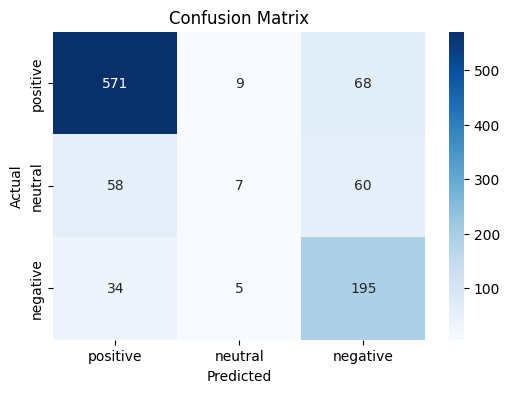


Classification Report:
              precision    recall  f1-score   support

    negative     0.6037    0.8333    0.7002       234
     neutral     0.3333    0.0560    0.0959       125
    positive     0.8612    0.8812    0.8711       648

    accuracy                         0.7676      1007
   macro avg     0.5994    0.5902    0.5557      1007
weighted avg     0.7359    0.7676    0.7351      1007

Finished combination 2/5

 Trying combination 3/5: LR=5e-05, Batch Size=4, Epochs=3
Epoch 1/3, Loss: 0.3337
Epoch 2/3, Loss: 0.1727
Epoch 3/3, Loss: 0.1341

 Evaluation Metrics:
Accuracy: 0.7001
Precision (weighted): 0.7784
Recall (weighted): 0.7001
F1 Score (weighted): 0.7293


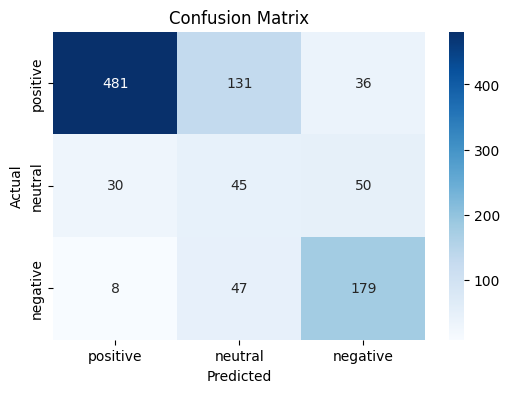


Classification Report:
              precision    recall  f1-score   support

    negative     0.6755    0.7650    0.7174       234
     neutral     0.2018    0.3600    0.2586       125
    positive     0.9268    0.7423    0.8243       648

    accuracy                         0.7001      1007
   macro avg     0.6013    0.6224    0.6001      1007
weighted avg     0.7784    0.7001    0.7293      1007

Finished combination 3/5

 Trying combination 4/5: LR=3e-05, Batch Size=16, Epochs=2


OutOfMemoryError: CUDA out of memory. Tried to allocate 64.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 36.12 MiB is free. Process 6504 has 14.70 GiB memory in use. Of the allocated memory 13.30 GiB is allocated by PyTorch, and 1.27 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from copy import deepcopy
from torch.utils.data import DataLoader

# Define  hyperparameter combinations
param_grid = [
    {"learning_rate": 3e-5, "batch_size": 8, "epochs": 3},
    {"learning_rate": 1e-5, "batch_size": 8, "epochs": 4},
    {"learning_rate": 5e-5, "batch_size": 4, "epochs": 3},
    {"learning_rate": 3e-5, "batch_size": 16, "epochs": 2},
    {"learning_rate": 2e-5, "batch_size": 8, "epochs": 5}
]

results = []

for i, params in enumerate(param_grid):
    print(f"\n Trying combination {i+1}/{len(param_grid)}: LR={params['learning_rate']}, Batch Size={params['batch_size']}, Epochs={params['epochs']}")

    # Rebuild dataloaders with current batch size
    train_loader = DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=params["batch_size"])

    # Clone a fresh model (so each run starts from scratch)
    model_copy = deepcopy(model)

    # Train and evaluate
    train_model(model_copy, train_loader, epochs=params["epochs"], learning_rate=params["learning_rate"])
    metrics = evaluate_model(model_copy, test_loader, tokenizer)

    # Store results
    results.append({
        "params": params,
        "metrics": metrics
    })
    print(f"Finished combination {i+1}/{len(param_grid)}")

#clear Memory cache
import torch
torch.cuda.empty_cache()
print("GPU memory cleared.")

In [ ]:
# Sort by highest F1 score
best_run = sorted(results, key=lambda x: x["metrics"]["f1_score"], reverse=True)[0]

print("\n Best Run:")
print("Hyperparameters:", best_run["params"])
print("Metrics:", best_run["metrics"])



 Best Run:
Hyperparameters: {'learning_rate': 3e-05, 'batch_size': 8, 'epochs': 3}
Metrics: {'accuracy': 0.7537239324726912, 'precision': 0.7328510559423782, 'recall': 0.7537239324726912, 'f1_score': 0.7363872446745537}


In [ ]:
#Run Training and Evaluation (with best params)
# Use best hyperparameters from earlier tuning
best_lr = 3e-5
best_epochs = 3
best_batch_size = 8

best_train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
best_model=train_model(model, best_train_loader, epochs=best_epochs, learning_rate=best_lr)
metrics = evaluate_model(best_model, test_loader, tokenizer)